In [1]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
snail_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv')
snail_df.info()
snail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
### We would like to test whether the whole weight of the snail is on average different between male and female snails.

In [4]:
snail_m = snail_df[(snail_df['Sex'] == 'M')]
snail_m.info()
snail_m.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 119.4+ KB


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


In [5]:
snail_f = snail_df[(snail_df['Sex'] == 'F')]
snail_f.info()
snail_f.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   object 
 1   Length                 1307 non-null   float64
 2   Diameter               1307 non-null   float64
 3   Height                 1307 non-null   float64
 4   Whole_weight           1307 non-null   float64
 5   Shucked_weight         1307 non-null   float64
 6   Viscera_weight         1307 non-null   float64
 7   Shell_weight           1307 non-null   float64
 8   Class_number_of_rings  1307 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 102.1+ KB


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.33,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.26,16
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.32,19
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.21,14


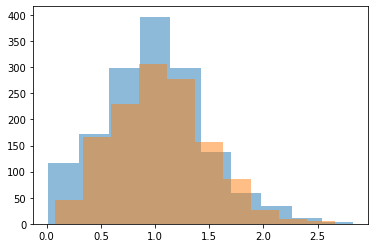

In [6]:
plt.hist(snail_m['Whole_weight'], alpha = 0.5)
plt.hist(snail_f['Whole_weight'], alpha = 0.5)
plt.show()

In [9]:
print(stats.describe(snail_m['Whole_weight']))
print(stats.describe(snail_f['Whole_weight']))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


In [10]:
stats.ttest_ind(snail_m['Whole_weight'], snail_f['Whole_weight'])

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

In [13]:
def get_95_conf_int(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_diff = sample_2_mean - sample_1_mean
    std_err_diff = math.sqrt((sample_1_var/sample_1_n) + (sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_diff
    ci_low = mean_diff - margin_of_error
    ci_up = mean_diff + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_low)+" and " +str(ci_up) + ".")
get_95_conf_int(snail_m['Whole_weight'], snail_f['Whole_weight'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.021891169188311944 and 0.08825425196320211.'

[[Text(0, 0, 'snail_m'), Text(0, 0, 'snail_f')]]

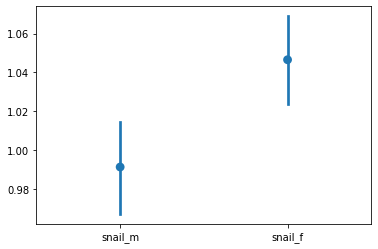

In [14]:
g = sns.pointplot(data = [snail_m['Whole_weight'],
                         snail_f['Whole_weight']], join = False)
g.set(xticklabels = ['snail_m', 'snail_f'])